# Initializing libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

import os
from pathlib import Path

In [33]:
processed_data_dir = Path("../data/processed")

df = pd.read_csv(processed_data_dir / "kzt_exchange_rates_processed_classic.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Splitting the data by time

In [41]:
train, test = df.iloc[:-180], df.iloc[-180:]

# Training the ARIMA model

In [42]:
model = auto_arima(
    train['exchange_rate'],
    seasonal=True,
    m=7,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=19443.886, Time=5.27 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=19449.266, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=19445.749, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=19445.765, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=19450.929, Time=0.06 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=19446.297, Time=3.63 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=19446.297, Time=3.09 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=19445.191, Time=11.15 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=19445.544, Time=13.88 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=19444.298, Time=1.87 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=19447.308, Time=8.96 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=19447.330, Time=7.49 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=19451.308, Time=13.39 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=19445.144, Time=4.77 sec
 ARIMA(2,1,1)(1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 3851
Model:             SARIMAX(1, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -9713.758
Date:                             Sat, 06 Dec 2025   AIC                          19443.515
Time:                                     16:09:26   BIC                          19493.562
Sample:                                 11-24-2014   HQIC                         19461.290
                                      - 06-09-2025                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.001      1.090      0.276      -0.001       0.004
ar.L1          0.9038      0.054     16.594      0.000       0.797       1.011
ma.L1         -0.9469      0.055    -17.239      0.000      -1.055      -0.839
ma.L2          0.0397      0.017      2.381      0.017       0.007       0.072
ma.L3          0.0191      0.014      1.353      0.176      -0.009       0.047
ar.S.L7        0.8410      0.087      9.639      0.000       0.670       1.012
ma.S.L7       -0.8613      0.082    -10.531      0.000      -1.022      -0.701
sigma2         9.0982      0.044    208.852      0.000       9.013       9.184
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            700823.28
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             3.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
forecast = model.predict(n_periods=len(test))

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print(mae, rmse)

27.052361803804914 30.610667752831702


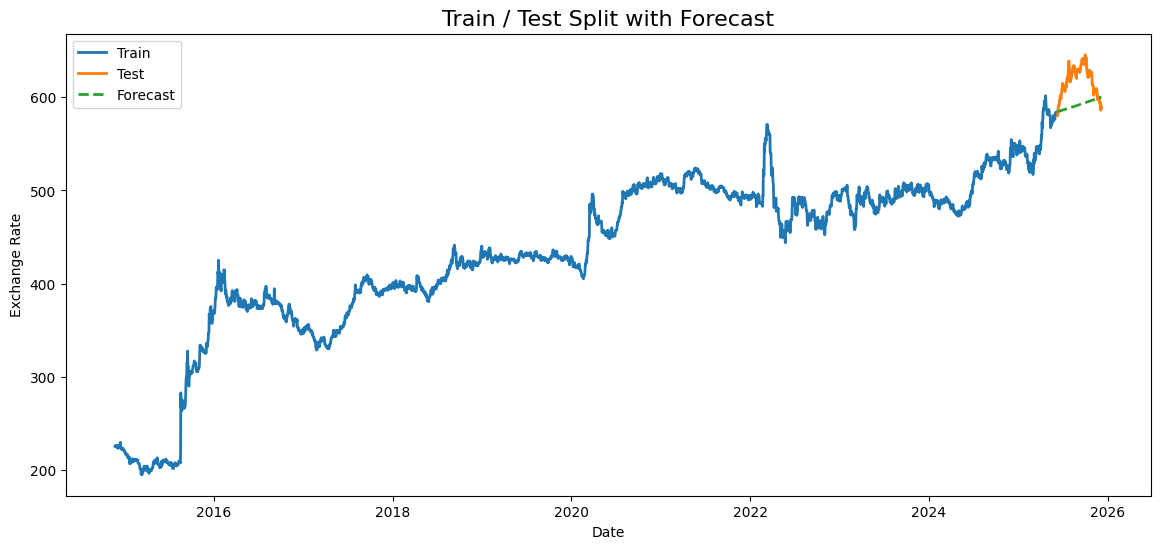

In [45]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label="Train", linewidth=2)
plt.plot(test.index, test, label="Test", linewidth=2)
plt.plot(forecast.index, forecast, label="Forecast", linestyle="--", linewidth=2)
plt.title("Train / Test Split with Forecast", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()